### CDS NYU
### DS-GA 1007 | Programming for Data Science
### Lab 04
### September 28, 2022


# Program Efficiency and Algorithmic Complexity

## Section Leaders


Cora Mao  --  ym1596@nyu.edu  -- 

Devarsh Patel --  dp3324@nyu.edu  --


## Resources

* https://docs.python.org/3/library/timeit.html


## 1. Measuring Efficiency of Programs

### Remember: $\bf\:1$ s $\,=\,$ $\bf10^{3}$ ms $\,=\,$ $\bf10^{6}$ µs $\,=\,$ $\bf10^{9}$ ns

### Iterative and Recursive Functions

#### Iterative function to calculate $\bf x^2$

In [1]:
def square(x):
    x2 = 0
    for i in range(x):
        for j in range(x):
            x2 += 1
    return x2

In [2]:
print(square(0), square(3), square(5))

0 9 25


In [3]:
import time
t0 = time.time()
square(1000)
dt = time.time()-t0
print(f"Run time: {dt} seconds")

Run time: 0.06898689270019531 seconds


In [4]:
%time square(1000)

CPU times: user 64.7 ms, sys: 2.6 ms, total: 67.3 ms
Wall time: 72.3 ms


1000000

In [5]:
%timeit square(1000)

63.4 ms ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%timeit -n 10 square(1000)

53.2 ms ± 2.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%timeit -n 10 -r 2 square(1000)

61.3 ms ± 8.88 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)


#### Recursive function to calculate $\bf x^2$

Math: 
$(x-1)^{2}=x^{2} –2x+1 ⇒ x^{2} =(x-1)^{2} + 2x - 1$
* $1^{2} = 1$
* $2^{2} = 1 + 3$
* $3^{2} = 1 + 3 + 5$
* .........
* $k^{2} =1+3+5+...+(2k-1)$

In [8]:
def square_recursive(x):
    if x == 0:
        return x
    else:
        x2 = square_recursive(x-1)+2*x-1
        return(x2)

In [9]:
print(square_recursive(0), square_recursive(3), square_recursive(5))

0 9 25


In [10]:
%timeit square_recursive(1000)

216 µs ± 24.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### A quick peak into NumPy (Lecture 5) vectorized array manipulation to calculate $\bf x^2$ 

In [11]:
import numpy 
%timeit numpy.square(1000)

885 ns ± 19.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Thus, on this laptop with this setup, on average, applied to the input n = 1000, the recursive function was approximately 20 times faster than the iterative function. The NumPy vectorized version was approximately 6000 times faster!

---

## 2. Sorting sequences 

---

### The Insertion Sort algorithm 
This is a slight variation on the Selection Sort algorithm seen during the lecture: for each index i in list, loop from i to 1 and insert element i +1 right after the first element found that is lower to it

https://en.wikipedia.org/wiki/Insertion_sort
* Insertion sort iterates and consumes one input element at each repetition, growing a sorted output list
* At each iteration, insertion sort removes one element from the input data, finds the location where it belongs within the sorted list, and inserts it there
* It repeats until no input element remains

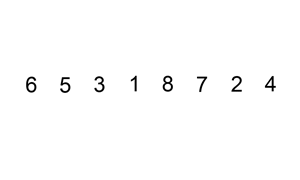

In [ ]:
from IPython.display import Image
from IPython.display import IFrame
Image(filename="InsertionSort.gif.png")

In [12]:
def insertion_sort(l):
    
    for i in range(1, len(l)):
        ivalue = l[i]
        position = i
            
        while position > 0 and l[position - 1] > ivalue:
            l[position] = l[position - 1]
            position -= 1
            
        l[position] = ivalue

In [13]:
test_l = [3, 7, 4, 9, 5, 2, 6, 1]
print("List before:", test_l)
insertion_sort(test_l)
print("List after :", test_l)

List before: [3, 7, 4, 9, 5, 2, 6, 1]
List after : [1, 2, 3, 4, 5, 6, 7, 9]


#### Let's display intermediate steps: 

In [14]:
def insertion_sort_debug(l):
    
    for i in range(1, len(l)):
        ivalue = l[i]
        position = i
        
        print("=" * 80)
        print("(val, pos):", (ivalue, position), "\tl:", l)
        print("-" * 80)
            
        while position > 0 and l[position - 1] > ivalue:
            l[position] = l[position - 1]
            position -= 1
            print("(val, pos):", (ivalue, position), "\tl:", l)
            
            
        l[position] = ivalue

        print("index:", i, "\t\tl:", l)
        print("=" * 80)

In [15]:
test_l = [3, 7, 4, 9, 5, 2, 6, 1]
print("List before:", test_l)
insertion_sort_debug(test_l)
print("List after :", test_l)

List before: [3, 7, 4, 9, 5, 2, 6, 1]
(val, pos): (7, 1) 	l: [3, 7, 4, 9, 5, 2, 6, 1]
--------------------------------------------------------------------------------
index: 1 		l: [3, 7, 4, 9, 5, 2, 6, 1]
(val, pos): (4, 2) 	l: [3, 7, 4, 9, 5, 2, 6, 1]
--------------------------------------------------------------------------------
(val, pos): (4, 1) 	l: [3, 7, 7, 9, 5, 2, 6, 1]
index: 2 		l: [3, 4, 7, 9, 5, 2, 6, 1]
(val, pos): (9, 3) 	l: [3, 4, 7, 9, 5, 2, 6, 1]
--------------------------------------------------------------------------------
index: 3 		l: [3, 4, 7, 9, 5, 2, 6, 1]
(val, pos): (5, 4) 	l: [3, 4, 7, 9, 5, 2, 6, 1]
--------------------------------------------------------------------------------
(val, pos): (5, 3) 	l: [3, 4, 7, 9, 9, 2, 6, 1]
(val, pos): (5, 2) 	l: [3, 4, 7, 7, 9, 2, 6, 1]
index: 4 		l: [3, 4, 5, 7, 9, 2, 6, 1]
(val, pos): (2, 5) 	l: [3, 4, 5, 7, 9, 2, 6, 1]
--------------------------------------------------------------------------------
(val, pos): (2, 4

### Example to quickly estimate number of operations: 

In [16]:
def insertion_sort_cnt_ops(l):
    
    cnt = 0
    
    for i in range(1, len(l)):
        ivalue = l[i]
        position = i
            
        cnt += 1
        
        while position > 0 and l[position - 1] > ivalue:
            l[position] = l[position - 1]
            position -= 1
            
            cnt += 1
            
        l[position] = ivalue
    return cnt

In [17]:
l = [3, 7, 4, 9, 5, 2, 6, 1]
print("List:", l)
print("len(l)=%d; cnt=%d" % (len(l), insertion_sort_cnt_ops(l)))

List: [3, 7, 4, 9, 5, 2, 6, 1]
len(l)=8; cnt=24


In [18]:
l = sorted([3, 7, 4, 9, 5, 2, 6, 1])
print("List:", l)
print("len(l)=%d; cnt=%d" % (len(l), insertion_sort_cnt_ops(l)))

List: [1, 2, 3, 4, 5, 6, 7, 9]
len(l)=8; cnt=7


In [19]:
l = sorted([3, 7, 4, 9, 5, 2, 6, 1], reverse=True)
print("List:", l)
print("len(l)=%d; cnt=%d" % (len(l), insertion_sort_cnt_ops(l)))

List: [9, 7, 6, 5, 4, 3, 2, 1]
len(l)=8; cnt=35


Worst-case complexity of the insertion sort algorithm, for $n = \textrm{len}(l)$, is the same as for selection sort: 

$$O(n^2)$$

### The Merge-Sort algorithm: 

This is a Divide-and-Conquer sorting strategy, which is much more efficient for large $n$ (covered during the lecture). 

In summary:
* Divide the unsorted list into $n$ sublists, each containing one element (a list of one element is by definition sorted)
* Sort sublists by pairs while merging them back together into one single (sorted) list

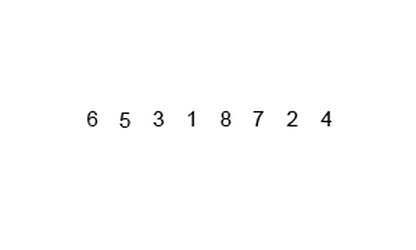

In [ ]:
from IPython.display import Image
from IPython.display import IFrame
Image(filename="MergeSort.gif")

### First, define function to merge two sorted lists:

In [27]:
def merge(left, right):
    result = []
    i,j = 0,0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    while (i < len(left)):
        result.append(left[i])
        i += 1
    while (j < len(right)):
        result.append(right[j])
        j += 1
    return result

In [28]:
x = [1]
y = [5]

merge(x, y)

[1, 5]

In [29]:
x = [1, 5]
y = [2, 9]

merge(x, y)

[1, 2, 5, 9]

In [30]:
x = [1, 2, 5, 9]
y = [3, 4, 6, 7, 8]

merge(x, y)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [31]:
x = [-5, 0, 12, 15]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9]

merge(x, y)

[-5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 15]

### Now, define function to recursively split the original list into half sublists until each sublist is one element (= sorted by definition), then merge sorted sublists back into one list 

In [32]:
def merge_sort(L):
    if len(L) < 2:
        return L[:]
    else:
        middle = len(L)//2
        left = merge_sort(L[:middle])
        right = merge_sort(L[middle:])
        return merge(left, right)


In [33]:
l = [12, 1, 0, 7, 4, 3, 15, 6, 2, 8, 9, -5, 5]
merge_sort(l)

[-5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 15]

1. **Divide**: $O(\log n)$: `merge-sort` calls itself recursively and divides lists into halves until each sublist contains only 1 element, which results in $\log n$ recursive levels, each of which carries a small finite number of operations (branching + compute middle index + 3 function calls + assignments), which is just a multiplcative factor. The worst-case order of growth is thus  $\log n$, same order of growth as for bisection search seen in the lecture


2. **Conquer**: $O(n)$: `merge` is called at each recursion level to sort pairs of sublists which are already sorted. The number of comparisons to make is the number of elements at most, because smallest elements are always the first elements in sorted sublists (no need for a nested loop). 
In addition, merging the sublists requires copying each element once, which takes exactly $n$ operations. 
So in total, the `merge-sort` function takes O(n) + n ops at each recursion level, and is thus order $n$


$=>$ **Divide-and-Conquer**: Combined together, these two functions have worst-case order of growth:  $\: O(n \log n)$



### Python has built-in function to sort lists

####  The `Sort` function

In [34]:
l = [1, 3, 4, 2] 

# Sorting list of Integers in ascending order
l.sort() 

print(l) 


[1, 2, 3, 4]


In [35]:
l = [1, 3, 4, 2] 

# Sorting list of Integers in descending order
l.sort(reverse = True) 

print(l) 


[4, 3, 2, 1]


In [36]:
s = ["Hi","Welcome", "to", "lab", "4"] 

# Sorting list of Strings in ascending order 
s.sort() 

print(s) 


['4', 'Hi', 'Welcome', 'lab', 'to']


In [37]:
# Sorting using second key
l = [(1, 2), (3, 3), (1, 1)] 

# Function to return the second element of the two elements passed as the parameter
def sortSecond(val): 
    return val[1] 

# Sorting array in ascending order according to second element
l.sort(key = sortSecond) 
print(l) 

[(1, 1), (1, 2), (3, 3)]


In [38]:
# Sorting array in descending order according to second element 
l.sort(key = sortSecond, reverse = True) 
print(l) 

[(3, 3), (1, 2), (1, 1)]


#### The `Sorted` function

In [39]:
x = [2, 8, 1, 4, 6, 3, 7] 

print ("Sorted list returned :"), 
print (sorted(x)) 

print ("\nReverse sort :"), 
print (sorted(x, reverse = True)) 

print ("\nOriginal list not modified :"), 
print (x) 


Sorted list returned :
[1, 2, 3, 4, 6, 7, 8]

Reverse sort :
[8, 7, 6, 4, 3, 2, 1]

Original list not modified :
[2, 8, 1, 4, 6, 3, 7]


In [40]:
# List 
x = ['q', 'w', 'r', 'e', 't', 'y'] 
print (sorted(x)) 

['e', 'q', 'r', 't', 'w', 'y']


In [41]:
# Tuple 
x = ('q', 'w', 'e', 'r', 't', 'y') 
print (sorted(x))

['e', 'q', 'r', 't', 'w', 'y']


In [42]:
# String-sorted based on ASCII translations 
x = "qwerty"
print (sorted(x)) 


['e', 'q', 'r', 't', 'w', 'y']


In [43]:
# Dictionary 
x = {'q':1, 'w':2, 'e':3, 'r':4, 't':5, 'y':6} 
print (sorted(x)) 


['e', 'q', 'r', 't', 'w', 'y']


In [44]:
# Set 
x = {'q', 'w', 'e', 'r', 't', 'y','y'} 
print (sorted(x)) 

['e', 'q', 'r', 't', 'w', 'y']


In [45]:
# Frozen Set 
x = frozenset(('q', 'w', 'e', 'r', 't', 'y')) 
print (sorted(x)) 

['e', 'q', 'r', 't', 'w', 'y']


In [46]:
#Sorted using a key
L = ["cccc", "b", "dd", "aaa"] 

print ("Normal sort :", sorted(L)) 

print ("Sort with len :", sorted(L, key = len)) 

Normal sort : ['aaa', 'b', 'cccc', 'dd']
Sort with len : ['b', 'dd', 'aaa', 'cccc']


In [47]:
# Sort a list of integers based on their remainder after division by 7 

def f(x): 
    return x % 7

l = [15, 3, 11, 7] 

print ("Normal sort :", sorted(l)) 
print ("Sorted with key:", sorted(l, key = f)) 


Normal sort : [3, 7, 11, 15]
Sorted with key: [7, 15, 3, 11]


#### Another quick peak into NumPy (Lecture 5): The `NumPy sort` and `NumPy argsort` functions

In [48]:
import numpy as np 

arr = np.array([3, 2, 0, 1])
print(np.sort(arr))

arr = np.array(["Hi","Welcome", "to", "lab", "3"])
print(np.sort(arr))

[0 1 2 3]
['3' 'Hi' 'Welcome' 'lab' 'to']


In [49]:
# Two-dimensional array
a = np.array([[12, 15], [10, 1]]) 
print("\nOriginal array : \n", a)

# Sort along the first
arr1 = np.sort(a, axis = 0)
print ("\nAlong first axis : \n", arr1)

# Sort along the second axis 
arr2 = np.sort(a, axis = 1)
print ("\nAlong second axis : \n", arr2) 

arr3 = np.sort(a, axis = None)
print ("\nAlong none axis : \n", arr3) 

arr4 = np.sort(a)
print ("\nAlong default axis : \n", arr4) 



Original array : 
 [[12 15]
 [10  1]]

Along first axis : 
 [[10  1]
 [12 15]]

Along second axis : 
 [[12 15]
 [ 1 10]]

Along none axis : 
 [ 1 10 12 15]

Along default axis : 
 [[12 15]
 [ 1 10]]


In [50]:
# Use argsort to get the index of sorted elements
x = np.array([3, 1, 2])
np.argsort(x)

# Two dimentioanl array
in_arr = np.array([[ 2, 0, 1], [ 5, 4, 3]]) 
print ("Input array\n ", in_arr)  
  
# Sorted array indices along the first axis 
out_arr1 = np.argsort(in_arr, kind ='mergesort', axis = 0) 
print ("Output sorteded array indices along axis 0: ", out_arr1) 

# Sorted array indices along the second axis 
out_arr2 = np.argsort(in_arr, kind ='heapsort', axis = 1) 
print ("Output sorteded array indices along axis 1: ", out_arr2) 

Input array
  [[2 0 1]
 [5 4 3]]
Output sorteded array indices along axis 0:  [[0 0 0]
 [1 1 1]]
Output sorteded array indices along axis 1:  [[1 2 0]
 [2 1 0]]


### Exercise 

Given a list representing a basket of fruits, sort the basket with increasing frequency count.

In [51]:
basket=["orange","apple","banana","apple","kiwi","orange","kiwi","kiwi"]

## **Thank you everyone!**